# Additional Insights #

## SCRIPT CONTAINS:
### Import Libraries
### Import Data
### Additional Insights
#### family status and loyalty 
#### Order Frequency by department 
#### Price Range Comparison 
#### Crosstab of loyalty and price range
#### Stacked bar chart of loyalt x price range stats
#### crosstab of customer profile and price range
#### crosstab spending habit by profile
#### crosstab order frequency by customer profile
#### crosstab family status distribution by region
#### crosstab of spending habits by family status
#### Crosstab of order frequency by family status

In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Import Data 
path = r'C:\Users\Bradley Allen\Desktop\Instacart Basket Analysis'

In [3]:
final_df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'Instacart_final3.pkl'))

In [4]:
final_df.shape

(6164429, 33)

In [5]:
final_df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,product_name,...,fam_status,income,_merge,region,exclusion_flag,age_range,income_bracket,parental_status,customer_profile,price_range
0,2539329,1,1,2,8,NaN,True,196,1,Soda,...,married,40423,both,South,Frequent Customer,30-39,<100000,Parent,Young parent,Mid range product
1,2539329,1,1,2,8,NaN,True,12427,3,Original Beef Jerky,...,married,40423,both,South,Frequent Customer,30-39,<100000,Parent,Young parent,Low range product
2,2398795,1,2,3,7,15.0,False,10258,2,Pistachios,...,married,40423,both,South,Frequent Customer,30-39,<100000,Parent,Young parent,Low range product
3,473747,1,3,3,12,21.0,False,12427,2,Original Beef Jerky,...,married,40423,both,South,Frequent Customer,30-39,<100000,Parent,Young parent,Low range product
4,473747,1,3,3,12,21.0,False,10258,3,Pistachios,...,married,40423,both,South,Frequent Customer,30-39,<100000,Parent,Young parent,Low range product


## Additional Insights ##

### family status and loyalty ###

In [6]:
xtab_fam_loyalty = pd.crosstab(final_df['fam_status'], final_df['loyalty_flag'], dropna = False)

In [7]:
xtab_fam_loyalty

loyalty_flag,Loyal customer,New customer,Regular customer
fam_status,,,
divorced/widowed,174465,80569,271735
living with parents and siblings,97977,44316,153061
married,1431148,676919,2220944
single,337930,159128,516237


In [8]:
xtab_fam_loyalty.to_clipboard()

### Order Frequency by department ###

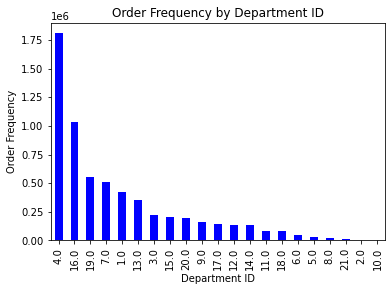

In [10]:
# Bar chart of order freq. based on item department
dept_freq_bar = final_df['department_id'].value_counts().plot.bar(color = ['blue'], xlabel= 'Department ID', ylabel= 'Order Frequency', title =  'Order Frequency by Department ID')

In [11]:
# Export bar chart as png file
dept_freq_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dept_freq_bar.png'))

### Price Range Comparison ###

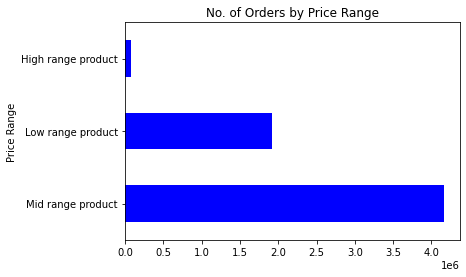

In [12]:
# Bar chart of orders by dept id and price
price_range_bar = final_df['price_range'].value_counts().plot.barh(color = ['blue'], xlabel= 'Price Range', ylabel= 'N. of Orders', title= 'No. of Orders by Price Range')

In [13]:
# Export bar chart as png file
price_range_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'price_range_bar.png'))

### Crosstab of loyalty and price range ###

In [14]:
xtab_avg_order_price_range = pd.crosstab(final_df['loyalty_flag'], final_df['price_range'], dropna = False)

In [15]:
xtab_avg_order_price_range

price_range,High range product,Low range product,Mid range product
loyalty_flag,,,
Loyal customer,23731,636809,1380980
New customer,12857,300878,647197
Regular customer,41761,987307,2132909


In [17]:
xtab_avg_order_price_range.to_clipboard()

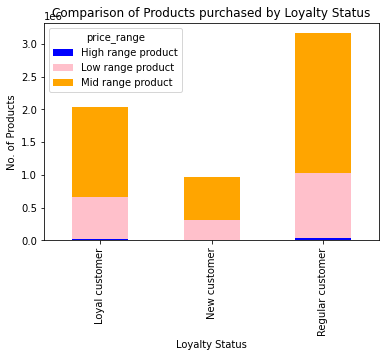

In [22]:
### Stacked bar chart of loyalt x price range stats 
stacked_order_price = xtab_avg_order_price_range.plot.bar(color = ['blue', 'pink', 'orange'], title = 'Comparison of Products purchased by Loyalty Status', xlabel = 'Loyalty Status', ylabel = 'No. of Products', stacked = True)

In [23]:
# export stacked bar chart as PNG 
stacked_order_price.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'stackedbar_price_loyalty.png'))

In [5]:
# Creating a line chart, average number dependants by age of customer
final_df_line = final_df[['age', 'n_dependants']]

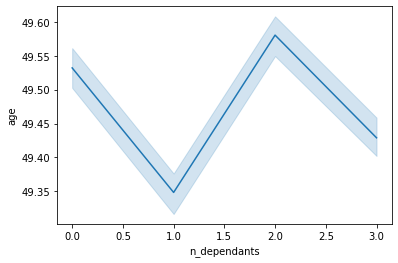

In [6]:
line_age_dependants = sns. lineplot(data = final_df_line, x = 'n_dependants', y = 'age')

In [10]:
# descriptive stats of number of dependants by age range of cusotmer
dependants_stats = final_df.groupby('age_range').agg({'n_dependants': ['mean', 'min', 'max']})

In [11]:
dependants_stats

n_dependants        
                  mean min max
age_range                     
20-29         1.495705   0   3
30-39         1.503328   0   3
40-49         1.500486   0   3
50-59         1.491391   0   3
60-69         1.509664   0   3
70-79         1.506598   0   3
80+           1.490447   0   3
<19           1.542076   0   3

In [12]:
dependants_stats.to_clipboard()

In [15]:
# crosstab for descriptive stats for customer profiles
customer_demographics = final_df.groupby('customer_profile').agg({'age': ['mean', 'min', 'max']})

In [16]:
customer_demographics

age        
                         mean min max
customer_profile                     
Higher earner       48.531709  41  59
Other               52.071026  18  81
Over 60             70.613824  60  81
Young parent        29.501443  20  39
Young single adult  28.570425  18  39

In [6]:
pd.options.display.max_columns = None

In [7]:
final_df.head(2)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,product_name,aisle_id,department_id,prices,max_order,loyalty_flag,user_avg_price,spending_habit,order_frequency,gender,state,age,date_joined,n_dependants,fam_status,income,_merge,region,exclusion_flag,age_range,income_bracket,parental_status,customer_profile,price_range
0,2539329,1,1,2,8,NaN,True,196,1,Soda,77.0,7.0,9.0,10,New customer,5.175,Lower spender,NaN,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Frequent Customer,30-39,<100000,Parent,Young parent,Mid range product
1,2539329,1,1,2,8,NaN,True,12427,3,Original Beef Jerky,23.0,19.0,4.4,10,New customer,5.175,Lower spender,NaN,Female,Alabama,31,2/17/2019,3,married,40423,both,South,Frequent Customer,30-39,<100000,Parent,Young parent,Low range product


In [18]:
# Crosstab customer profile x order price descriptives
cust_demo_price = final_df.groupby('customer_profile').agg({'prices': ['mean', 'min', 'max']})

In [19]:
cust_demo_price

prices           
                        mean  min   max
customer_profile                       
Higher earner       7.786254  1.0  25.0
Other               7.795092  1.0  25.0
Over 60             7.804677  1.0  25.0
Young parent        7.780429  1.0  25.0
Young single adult  7.775769  1.0  25.0

In [24]:
cust_demo_price.to_clipboard()

In [8]:
## crosstab of customer profile and price range
axtab_customer_demo_pricerange = pd.crosstab(final_df['customer_profile'], final_df['price_range'], dropna = False)

In [9]:
axtab_customer_demo_pricerange

price_range,High range product,Low range product,Mid range product
customer_profile,,,
Higher earner,43,1015,2143
Other,33925,828301,1789712
Over 60,20222,481845,1046973
Young parent,17863,449478,967667
Young single adult,6296,164355,354591


In [10]:
axtab_customer_demo_pricerange.to_clipboard()

In [11]:
## xtab spending habit by profile
xtab_profile_type_spending_habit = pd.crosstab(final_df['customer_profile'], final_df['spending_habit'], dropna = False)

In [12]:
xtab_profile_type_spending_habit

spending_habit,Higher spender,Lower spender
customer_profile,,
Higher earner,0,3201
Other,37247,2614691
Over 60,20096,1528944
Young parent,17873,1417135
Young single adult,6253,518989


In [13]:
xtab_profile_type_spending_habit.to_clipboard()

In [14]:
## crosstab order frequency by customer profile
xtab_customertype_freq = pd.crosstab(final_df['customer_profile'], final_df['order_frequency'], dropna = False)

In [15]:
xtab_customertype_freq

order_frequency,Frequent customer,Non-frequent customer
customer_profile,,
Higher earner,2001,424
Other,1609797,403415
Over 60,942147,234097
Young parent,874353,213778
Young single adult,316851,80463


In [16]:
xtab_customertype_freq.to_clipboard()

In [18]:
## family status distribution by region
xtab_fam_region = pd.crosstab(final_df['region'], final_df['fam_status'], dropna = False)

In [19]:
xtab_fam_region

fam_status,divorced/widowed,living with parents and siblings,married,single
region,,,,
Midwest,122931,70457,1013314,239995
Northeast,95263,51242,766410,173684
South,174610,100268,1438376,339474
West,123773,66306,1024114,240795


In [20]:
xtab_fam_region.to_clipboard()

In [22]:
## crosstab of spending habits by family status
xtab_fam_spending = pd.crosstab(final_df['fam_status'], final_df['spending_habit'], dropna = False)

In [23]:
xtab_fam_spending

spending_habit,Higher spender,Lower spender
fam_status,,
divorced/widowed,6925,519844
living with parents and siblings,3642,291712
married,57269,4271742
single,13633,999662


In [24]:
xtab_fam_spending.to_clipboard()

In [25]:
## Crosstab of order frequency by family status
xtab_fam_freq = pd.crosstab(final_df['fam_status'], final_df['order_frequency'], dropna = False)

In [26]:
xtab_fam_freq

order_frequency,Frequent customer,Non-frequent customer
fam_status,,
divorced/widowed,322070,78887
living with parents and siblings,180697,44135
married,2626917,656063
single,615465,153092


In [27]:
xtab_fam_freq.to_clipboard()